## TRandom、TRandom1、TRandom2、TRandom3与gRandom区别
TRandom 是ROOT中的随机数生成器的基类
TRandom1 和 TRandom2 是较早的随机数生成器，性能较差，不够随机。TRandom3 使用了更好的随机数生成算法，而且通常是ROOT中的推荐选择。gRandom 是 TRandom3 的全局实例，是ROOT默认的随机数生成器对象，因此在大多数情况下，您可以直接使用 gRandom 来生成高质量的随机数。

In [4]:
from ROOT import TH1D, TCanvas, TLegend, TRandom3, gRandom,gStyle,TF1

In [5]:
for i in range(10):
    print(f"第{i+1}次：{gRandom.Uniform()}")

第1次：0.12553928582929075
第2次：0.31574507080949843
第3次：0.18056692485697567
第4次：0.14222721941769123
第5次：0.6644296131562442
第6次：0.6851892229169607
第7次：0.19100193260237575
第8次：0.4363430186640471
第9次：0.9644592246040702
第10次：0.8681635903194547


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TROOT::Append>: Replacing existing TH1: h1d (Potential memory leak).


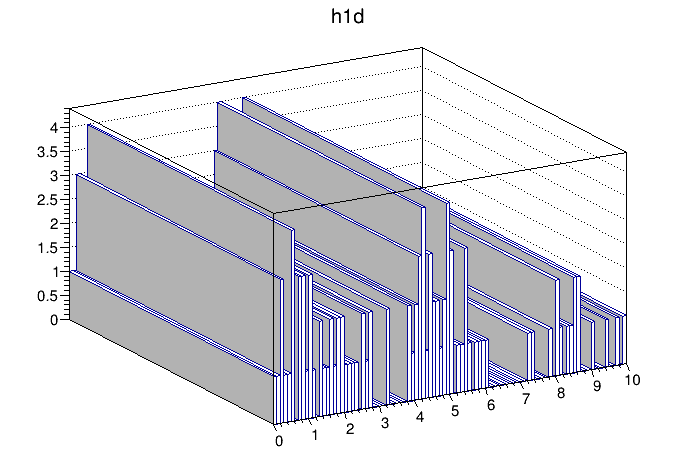

In [7]:
c2 = TCanvas("c2","c2",700,500)
h1d1 = TH1D("h1d","h1d",100,0,10)

f1 = TF1("f1","abs(sin(x)/x)*sqrt(x)",0,10) # abs(sin(x)/x)*sqrt(x) -> 函数表达式
for i in range(100):
    num_tmp = f1.GetRandom() # 生成随机数
    h1d1.Fill(num_tmp)
h1d1.Draw("LEGO1")
c2.Draw()
%jsroot off

In [9]:
c1 = TCanvas("c1","c1",700,500)
th1u = TH1D("th1d","th1d uniform",100,0,1)
# gRandom.Uniform() 用于生成均匀分布的随机数。
# gRandom.Uniform(0.0, 1.0) 生成一个位于0到1之间的随机数
for i in range(1000000):
    th1u.Fill(gRandom.Uniform())
th1u.Draw()
c1.Draw()
%jsroot on

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: th1d (Potential memory leak).


In [10]:
# 创建两个直方图对象，h1g1和h1g2，每个直方图有100个bin，取值范围在0到20之间
h1g1 = TH1D("h1g1", "", 100, 0, 20)
h1g2 = TH1D("h1g2", "", 100, 0, 20)

# 使用随机数种子生成器创建两个不同的种子值
seed1 = gRandom.Integer(10000)
seed2 = gRandom.Integer(10000)

# 使用不同的种子值创建两个TRandom3随机数生成器
rnd1 = TRandom3(seed1)
rnd2 = TRandom3(seed2)

# 使用随机数生成器填充直方图h1g1和h1g2
for i in range(100000):
    h1g1.Fill(rnd1.Gaus(10, 2))  # 使用均值10和标准差2生成正态分布的随机数并填充到h1g1
    h1g2.Fill(rnd2.Gaus(10, 3))  # 使用均值10和标准差3生成正态分布的随机数并填充到h1g2

In [11]:
# 分2个图绘制
c11 = TCanvas("c11", "c11", 700, 700)  # 创建一个名为"c11"的画布，大小为700x700像素
c11.SetGrid()  # 打开画布的网格
c11.Divide(1,2)

c11.cd(1)
# 绘制直方图h1g1
h1g1.Draw()
c11.cd(2)
# 绘制直方图h1g2，并使用"same"选项将它们绘制在同一画布上
h1g2.Draw()

# 显示画布c11
c11.Draw()

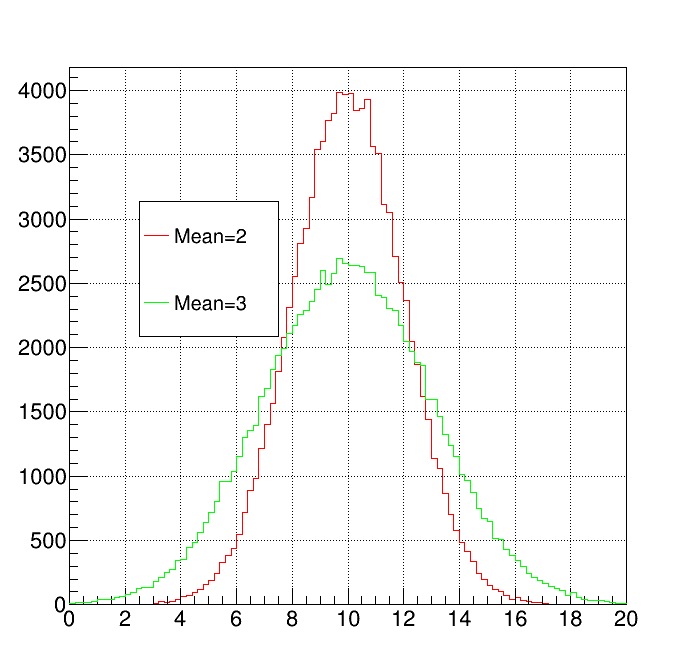

In [7]:
# 绘制到一张图
c12 = TCanvas("c12", "c12", 700, 700)  # 创建一个名为"c11"的画布，大小为700x700像素
c12.SetGrid()  # 打开画布的网格

# 为关闭统计信息
h1g1.SetStats(0)
h1g2.SetStats(0)

# 创建一个图例对象，指定位置
leg = TLegend(0.2, 0.5, 0.4, 0.7)

# 向图例中添加条目，包括文本标签和线条样式
leg.AddEntry(h1g1, "Mean=2", "l")  # "l"表示绘制线条
leg.AddEntry(h1g2, "Mean=3", "l")  # "l"表示绘制线条

# 设置直方图h1g1和h1g2的线条颜色
h1g1.SetLineColor(2)  # 使用颜色2（红色）
h1g2.SetLineColor(3)  # 使用颜色3（绿色）

# 绘制直方图h1g1
h1g1.Draw()

# same 将新的绘图命令与已经存在的绘图重叠在一起，而不是清除已经存在的绘图。
# 这使您能够在同一个画布上绘制多个图形或直方图，以进行比较或叠加显示，而不会覆盖之前绘制的内容。
# 绘制直方图h1g2，并使用"same"选项将它们绘制在同一画布上
h1g2.Draw("same")

# 绘制图例，也使用"same"选项将图例绘制在同一画布上
leg.Draw("same")

# 显示画布c11
c12.Draw()